In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/company-bankruptcy-prediction/data.csv


<h3>DataSet Link: </h3>

https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

In [2]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset
data = pd.read_csv("../input/company-bankruptcy-prediction/data.csv")

In [4]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
data.shape

(6819, 96)

In [7]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

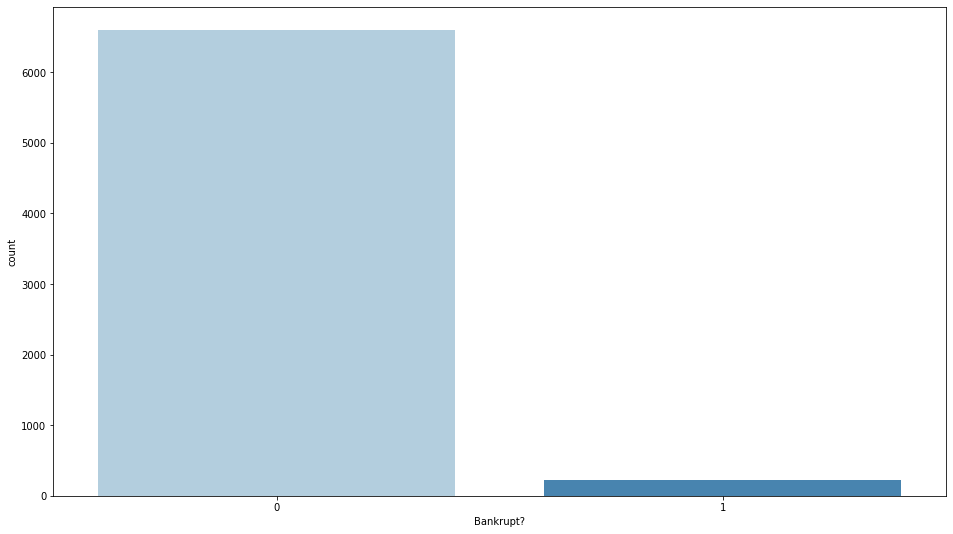

In [8]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'Bankrupt?',data = data,palette ='Blues' )
plt.show()

In [9]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


# Feature Selection

In [10]:
from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif
# to select the features
from sklearn.feature_selection import SelectKBest

In [11]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Bankrupt?'], axis=1),
    data['Bankrupt?'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((4773, 95), (2046, 95))

# Determine Mutual Information

In [12]:
# calculate the mutual information between the variables and the target

# the smaller the value of the mi, the less information we can infer from
# the feature about the target

mi = mutual_info_classif(X_train, y_train)
mi

array([0.02908633, 0.03427777, 0.02984251, 0.01664411, 0.01705692,
       0.02123495, 0.0301244 , 0.02794322, 0.03099597, 0.03678855,
       0.        , 0.        , 0.01349009, 0.00211279, 0.01662348,
       0.03305764, 0.02938684, 0.02831372, 0.0440584 , 0.00536824,
       0.0021194 , 0.02236696, 0.04332718, 0.00810723, 0.00667338,
       0.01246352, 0.00990363, 0.01086854, 0.01178737, 0.00311074,
       0.01152787, 0.00121526, 0.02803837, 0.02279955, 0.03441326,
       0.03342365, 0.03468837, 0.0351165 , 0.01071949, 0.03973993,
       0.00210085, 0.02385093, 0.04364584, 0.00496766, 0.01241669,
       0.        , 0.        , 0.00313475, 0.00876684, 0.00051602,
       0.        , 0.02427441, 0.00824127, 0.02650192, 0.00576042,
       0.00071265, 0.01679241, 0.02544502, 0.01470131, 0.01610328,
       0.01731491, 0.02265466, 0.00156288, 0.00269828, 0.02232087,
       0.02399633, 0.00371807, 0.03457833, 0.03417276, 0.00907948,
       0.        , 0.00496002, 0.01903018, 0.00182931, 0.00373

Text(0, 0.5, 'Mutual Information')

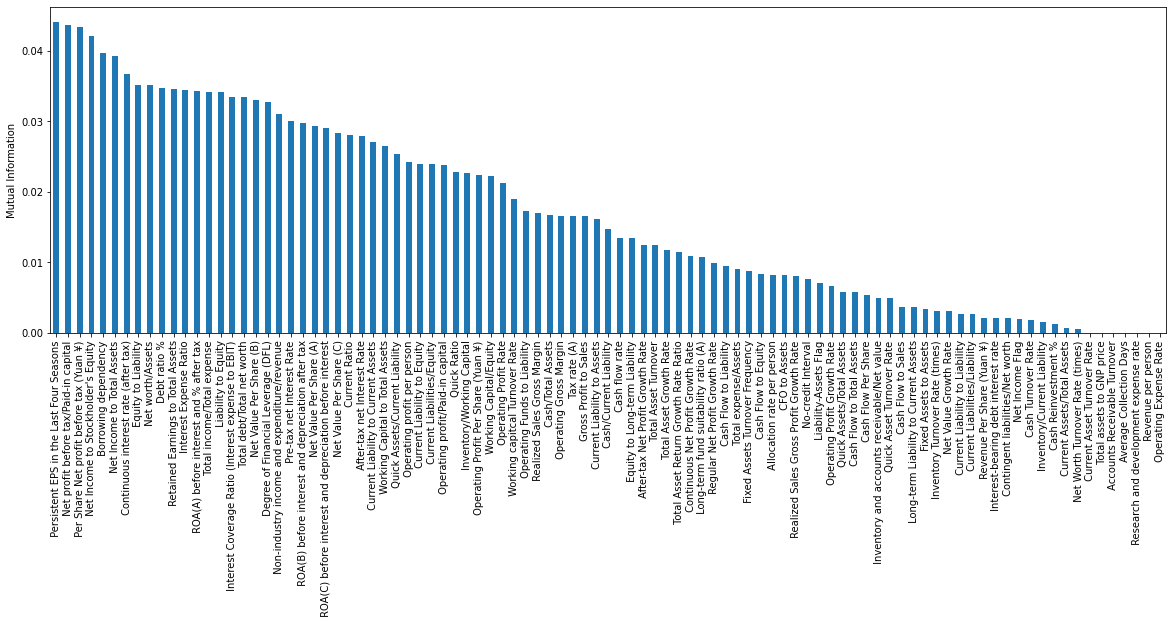

In [13]:
# 1) let's capture the above array in a pandas series
# 2)add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

> There are a few features (left of the plot) with higher mutual information values. There are also features with almost zero MI values on the right of the plot.
> 
> Once we find the mutual information values, to select features we need to determine a threshold, or cut-off value, above which a feature will be selected.
> 
> There are a few ways in which this can be done:
> 
> Select top k features, where k is an arbitrary number of features

# Select top k features based on MI

In [14]:
# here we will select the top 10 features
# based on their mutual information value

# select features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index([' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity', ' Equity to Liability'],
      dtype='object')

In [15]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [16]:
X_train.shape,X_test.shape

((4773, 10), (2046, 10))

# Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [19]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [20]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.9696969696969697


# SVM

In [21]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# Predict the tset set result of SVM

In [22]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1987    0]
 [  58    1]]


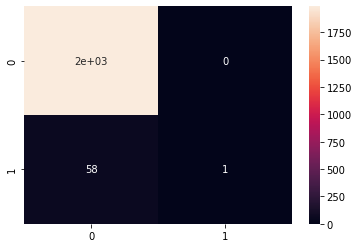

In [23]:
sns.heatmap(cm,annot=True)
plt.show()

In [24]:
acc2 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc2}")

Accuracy score: 0.9716520039100685


# Training the K-NN model on the Training set

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_pred = classifier.predict(X_test)

# KNN confusion matrix

In [27]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1961   26]
 [  45   14]]


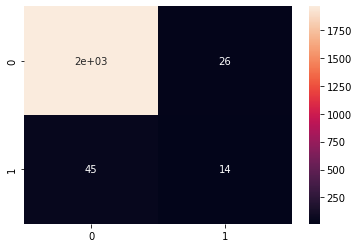

In [28]:
sns.heatmap(cm,annot=True)
plt.show()

In [29]:
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc3}")

Accuracy score: 0.9652981427174976


# Training the Naive Bayes on the Training set

In [30]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [31]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1923   64]
 [  27   32]]


In [32]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc4}")

Accuracy score : 0.955522971652004


# Training Decision Tree Classification on Train set

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [34]:
y_pred = classifier.predict(X_test)
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc5}")

Accuracy score: 0.947702834799609


# Training the Random Forest Classification model on the Training set

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [36]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc6 = accuracy_score(y_test, y_pred)

[[1973   14]
 [  50    9]]


In [37]:
print(f"Random Forest Classification accuracy: {acc6}")

Random Forest Classification accuracy: 0.9687194525904204


# XG Boost

In [38]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# XG Boost Classifier confusion matrix

In [39]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc7 = accuracy_score(y_test, y_pred)

[[1968   19]
 [  48   11]]


In [40]:
print(f"By XG Boost classifier Acc: {acc7}")

By XG Boost classifier Acc: 0.9672531769305963


# Training CatBoost on the Training set

In [41]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.020081
0:	learn: 0.6496940	total: 54ms	remaining: 53.9s
1:	learn: 0.6044917	total: 57.1ms	remaining: 28.5s
2:	learn: 0.5622949	total: 60.1ms	remaining: 20s
3:	learn: 0.5240697	total: 63.6ms	remaining: 15.8s
4:	learn: 0.4912042	total: 67.2ms	remaining: 13.4s
5:	learn: 0.4607658	total: 70.6ms	remaining: 11.7s
6:	learn: 0.4335303	total: 74.1ms	remaining: 10.5s
7:	learn: 0.4062611	total: 76.9ms	remaining: 9.54s
8:	learn: 0.3815863	total: 80ms	remaining: 8.81s
9:	learn: 0.3606635	total: 83.5ms	remaining: 8.27s
10:	learn: 0.3419757	total: 86.9ms	remaining: 7.81s
11:	learn: 0.3232164	total: 90.2ms	remaining: 7.43s
12:	learn: 0.3048934	total: 93.6ms	remaining: 7.1s
13:	learn: 0.2899081	total: 96.9ms	remaining: 6.83s
14:	learn: 0.2752334	total: 100ms	remaining: 6.58s
15:	learn: 0.2622553	total: 104ms	remaining: 6.37s
16:	learn: 0.2507765	total: 107ms	remaining: 6.19s
17:	learn: 0.2385888	total: 111ms	remaining: 6.04s
18:	learn: 0.2290213	total: 114ms	remaining: 5.89s
19:	

In [42]:

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc8 = accuracy_score(y_test, y_pred)

[[1974   13]
 [  50    9]]


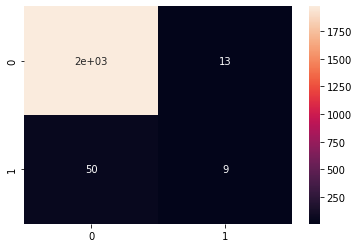

In [43]:
sns.heatmap(cm,annot=True)
plt.show()

In [44]:
print(acc8)

0.969208211143695


# Create visualization of all models.

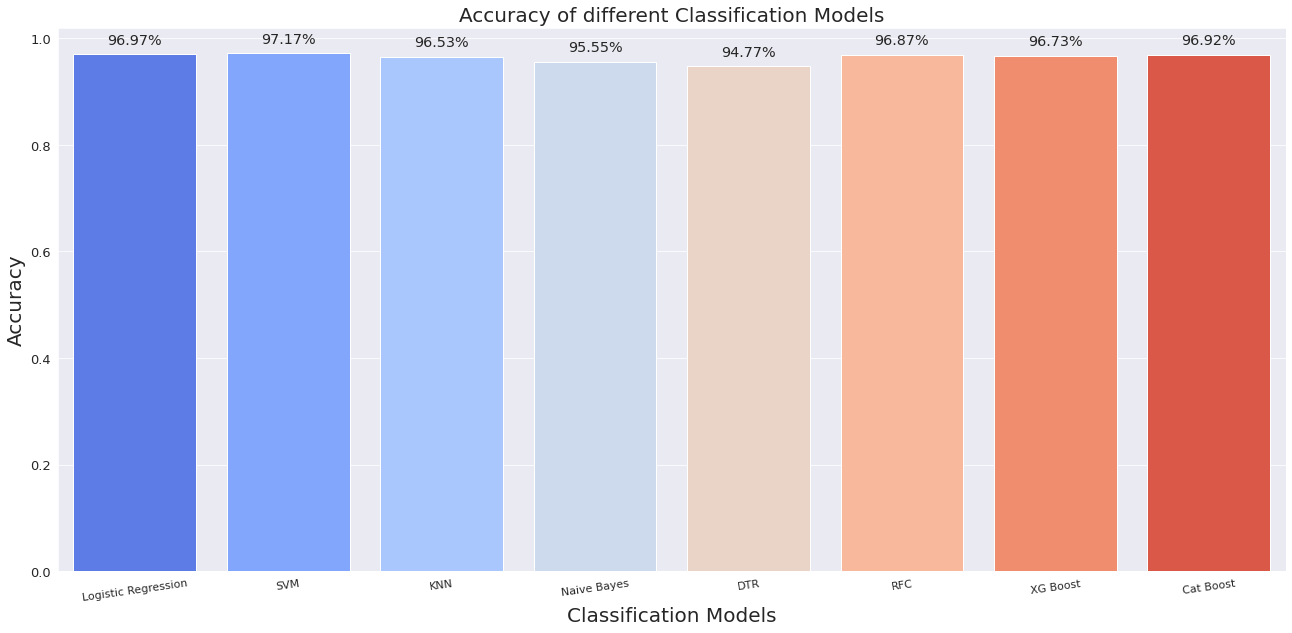

In [45]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Naive Bayes")
mylist.append(acc5)
mylist2.append("DTR")
mylist.append(acc6)
mylist2.append("RFC")
mylist.append(acc7)
mylist2.append("XG Boost")
mylist.append(acc8)
mylist2.append("Cat Boost")
plt.rcParams['figure.figsize']=22,10
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "coolwarm", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [46]:
df = data.copy()

In [47]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [48]:
X = df.drop(['Bankrupt?'],axis=1).values
y = df['Bankrupt?'].values

# Split the data set (for PCA)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
X_train.shape,X_test.shape

((5455, 95), (1364, 95))

# Feature Scaling

In [51]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# PCA

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [53]:
X_train.shape,X_test.shape

((5455, 2), (1364, 2))

In [54]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
pca_acc = accuracy_score(y_test, y_pred)

[[1312    6]
 [  42    4]]


In [56]:
print(f"PCA Accuracy is: {pca_acc}")

PCA Accuracy is: 0.9648093841642229


# Applying k-Fold Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.63 %
Standard Deviation: 0.37 %


![](https://phumyhung.vn/the-ascentia/wp-content/uploads/2019/06/thanks.png)